# Informa Project

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#### Column Names and Prefixes
PT = Patient token  

SD = Supply date of drug to patient  

ST = Supply time of drug to patient 

Pharmacy = Pharmacy in which the medicine was sold

YOB = Year of birth of patient

Sex = Gender

CNK = Unique ID of product nationwide  

ProductName = The name of the medicine sold

ATC code = international Code for product given by WHO

Units = Amount of units sold

Price = Price of product

In [2]:
column_names = ['PT', 'SD', 'ST', 'Pharmacy', 'YOB', 'Sex', 'CNK', 'ProductName',
               'ATC', 'Units', 'Price']

Importing the dataset 

Finding:  
In the SD column some data here in excel are saved as Integers and some just text.  
Therefore, I would have to convert the data here to simllar datatypes, since the column SD is the supply date of drugs to customers, I decided to convert this column to date datatype by using the parse_dates function while reading the csv 

In [3]:
# the parse date function here takes the entire SD column data and converts their datatype to dates
train_df = pd.read_csv('rawdata.csv', names=column_names)
train_df

PT          SD     ST Pharmacy   YOB  Sex      CNK  \
0        a  02/01/2017  17:14       A2  2016    2    62521   
1        a  02/01/2017  17:14       A2  2016    2    62521   
2        a  08/01/2020  15:13       A3  2019    1    62521   
3        a  09/01/2017    NaN       A1  2016    2  1543305   
4        a  23/01/2020  11:21       A2  2019    1  2322436   
...     ..         ...    ...      ...   ...  ...      ...   
1202778  a  27/05/2016  17:40       A2  2013    2  2707180   
1202779  a  27/05/2016  17:40       A2  2013    2    94987   
1202780  a  28/06/2016  08:57       A2  2013    2  2870582   
1202781  a  08/10/2015  16:54       A2  2013    2  1676758   
1202782  a  05/11/2015  18:49       A2  2013    2    94987   

                                               ProductName      ATC  Units  \
0                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
1                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
2                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
3                    ATROVENT MONODOSE 0,25MG/2ML VIALS 20  R03BB01     20   
4                             ROTATEQ 1 TUBE 1 DOSE = 2 ML  J07BH02      1   
...                                                    ...      ...    ...   
1202778  AMOXICILLINE SANDOZ 500MG/5ML PDR ORALE SUSP 1...  J01CA04      1   
1202779                   VENTOLIN SOL NEB 1 X 10 ML  0,5%  R03AC02      1   
1202780    BUDESONID SANDOZ 0,25MG/ML VERNEVELSUSP 4X5 AMP  R03BA02     20   
1202781              ATROVENT MONODOSE 0,25MG/2ML VIALS 60  R03BB01     60   
1202782                   VENTOLIN SOL NEB 1 X 10 ML  0,5%  R03AC02      1   

         Price  
0         7.14  
1         7.14  
2         7.29  
3        10.05  
4        53.37  
...        ...  
1202778   8.13  
1202779   6.32  
1202780  21.92  
1202781  17.99  
1202782   6.37  

[1202783 rows x 11 columns]

## Performing EDA on dataset

#### Checking the datatype of the Dataset  
    
    
Reason:  
I would like to know if my conversion of the SD column worked and would like to know the datatype of all other columns

In [4]:
train_df.dtypes

PT              object
SD              object
ST              object
Pharmacy        object
YOB              int64
Sex              int64
CNK              int64
ProductName     object
ATC             object
Units            int64
Price          float64
dtype: object

#### Getting general Statistical information about dataset


In [5]:
train_df.describe()

YOB           Sex           CNK         Units         Price
count  1.202783e+06  1.202783e+06  1.202783e+06  1.202783e+06  1.202783e+06
mean   1.959383e+03  1.586658e+00  1.714129e+06  4.466074e+01  3.102018e+01
std    2.238733e+01  4.924638e-01  1.061172e+06  4.249574e+01  1.058063e+02
min    0.000000e+00  0.000000e+00  1.162700e+04  0.000000e+00  2.000000e-02
25%    1.943000e+03  1.000000e+00  7.895370e+05  1.000000e+00  7.950000e+00
50%    1.957000e+03  2.000000e+00  1.677863e+06  3.000000e+01  1.196000e+01
75%    1.973000e+03  2.000000e+00  2.557163e+06  9.000000e+01  2.324000e+01
max    2.020000e+03  2.000000e+00  7.716558e+06  3.000000e+02  4.018330e+03

#### Checking for null values/rows that have no inputted value

Reason:  
I do this to see if any of the rows have no values inputted, therefore I would be able to make a decision either to drop the row or to find a way to fill in the missing data

In [6]:
train_df.isna().sum()

PT                  0
SD                  0
ST             597062
Pharmacy            0
YOB                 0
Sex                 0
CNK                 0
ProductName         0
ATC                 0
Units               0
Price               0
dtype: int64

Finding:  
The dataset column ST(Supply time of drug to customer) has 597,062 rows of data missing and ST is the only column in the dataset which has missing data 

#### Checking for duplicated rows

Reason:  
In a large datasets, I have found there is a high chance of rows being repeated/added more than once, therefore I decided to  check if this is true in this dataset.  

Searching for duplicted values is important because having them will affect an AI model's predicition, this is because the AI model will have similar occurences of the same data entry therefore causing biased prediciton.

In [7]:
duplicated_rows = train_df[train_df.duplicated()]
duplicated_rows

PT          SD     ST Pharmacy   YOB  Sex      CNK  \
1                     a  02/01/2017  17:14       A2  2016    2    62521   
8                     a  12/04/2018  10:49       A4  1964    2  2341402   
33                    a  23/07/2018  08:11       A4  1950    1  1580265   
55                    a  12/10/2016    NaN       A1  2015    1  1676758   
57                    a  12/10/2016    NaN       A1  2015    1  3026218   
...                 ...         ...    ...      ...   ...  ...      ...   
1202702  OqSzIvoj$#$sv;  23/08/2016  11:02       A6  2001    1  1334580   
1202735  OqtP77Ij$#HQ-?  28/05/2014    NaN       A3  1997    2  1085885   
1202738  OqtuZ:Oj$#I@i8  15/02/2017  14:56       A6  2001    2  1233493   
1202740  OqtuZ:Oj$#I@i8  15/02/2017  14:56       A6  2001    2  1233493   
1202741  OqtuZ:Oj$#I@i8  15/02/2017  14:56       A6  2001    2  1233493   

                                            ProductName      ATC  Units  Price  
1                   NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   7.14  
8                         LISINOPRIL EG COMP 56 X  5 MG  C09AA03     56   8.00  
33                   KEPPRA 1000MG COMP PELL 100X1000MG  N03AX14    100  96.10  
55                ATROVENT MONODOSE 0,25MG/2ML VIALS 60  R03BB01     60  17.28  
57       BUDESONID SANDOZ 0,5 MG/ML VERNEVELSUSP AMP 60  R03BA02     60  69.71  
...                                                 ...      ...    ...    ...  
1202702                    DOXYCYCLINE EG COMP 10X100MG  J01AA02     10   6.94  
1202735           ACTRAPID PENFILL 100 IU/ML 5 X 3,0 ML  A10AB01      5  33.06  
1202738                     TETRALYSAL CAPS 56 X 300 MG  J01AA04     56  28.57  
1202740                     TETRALYSAL CAPS 56 X 300 MG  J01AA04     56  28.57  
1202741                     TETRALYSAL CAPS 56 X 300 MG  J01AA04     56  28.57  

[90956 rows x 11 columns]

Finding:  
After checking if there are duplicated rows, I have found there are 90956 rows which have been duplicated in this dataset

#### Keeping duplicated rows in this dataset  

Reason:  
Upon consulting with our client we were told that we should keep the duplicated rows due to the fact that those rows could be a customer making the same purchase twice in one day.

In [8]:
products_sold_per_date = train_df.groupby(['YOB'])['ATC'].count()
products_sold_per_date

YOB
0          6
1898       7
1899       9
1900      12
1901      11
        ... 
2016    4020
2017    4193
2018    2575
2019    1417
2020     505
Name: ATC, Length: 118, dtype: int64

#### Fixing Supply Date column

In [9]:
test = []
for i in train_df['SD']:
    if '-' in i:
        o = pd.to_datetime(i, format='%m-%d-%Y').strftime('%d/%m/%Y')
        test.append(o)
    else:
        test.append(i)
        

In [10]:
test

['02/01/2017',
 '02/01/2017',
 '08/01/2020',
 '09/01/2017',
 '23/01/2020',
 '08/03/2016',
 '12/04/2018',
 '12/04/2018',
 '12/04/2018',
 '12/04/2018',
 '03/05/2016',
 '04/05/2015',
 '04/05/2015',
 '14/05/2018',
 '14/05/2018',
 '26/05/2015',
 '29/05/2017',
 '29/05/2017',
 '29/05/2017',
 '29/05/2017',
 '29/05/2017',
 '30/05/2017',
 '30/05/2017',
 '30/05/2017',
 '30/05/2017',
 '30/05/2017',
 '31/05/2018',
 '31/05/2018',
 '19/06/2018',
 '20/06/2017',
 '02/07/2018',
 '02/07/2018',
 '23/07/2018',
 '23/07/2018',
 '04/08/2017',
 '09/08/2016',
 '11/08/2015',
 '17/08/2018',
 '17/08/2018',
 '21/08/2018',
 '28/08/2018',
 '28/08/2018',
 '01/09/2018',
 '01/09/2018',
 '01/09/2018',
 '04/09/2015',
 '10/09/2015',
 '16/09/2015',
 '18/09/2018',
 '19/09/2017',
 '20/09/2016',
 '25/09/2015',
 '06/10/2017',
 '06/10/2017',
 '12/10/2016',
 '12/10/2016',
 '12/10/2016',
 '12/10/2016',
 '12/10/2017',
 '12/10/2017',
 '18/10/2017',
 '21/10/2020',
 '24/10/2016',
 '24/10/2016',
 '24/10/2016',
 '26/10/2016',
 '31/10/20

In [11]:
train_df['SD'] = test

In [12]:
train_df

PT          SD     ST Pharmacy   YOB  Sex      CNK  \
0        a  02/01/2017  17:14       A2  2016    2    62521   
1        a  02/01/2017  17:14       A2  2016    2    62521   
2        a  08/01/2020  15:13       A3  2019    1    62521   
3        a  09/01/2017    NaN       A1  2016    2  1543305   
4        a  23/01/2020  11:21       A2  2019    1  2322436   
...     ..         ...    ...      ...   ...  ...      ...   
1202778  a  27/05/2016  17:40       A2  2013    2  2707180   
1202779  a  27/05/2016  17:40       A2  2013    2    94987   
1202780  a  28/06/2016  08:57       A2  2013    2  2870582   
1202781  a  08/10/2015  16:54       A2  2013    2  1676758   
1202782  a  05/11/2015  18:49       A2  2013    2    94987   

                                               ProductName      ATC  Units  \
0                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
1                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
2                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
3                    ATROVENT MONODOSE 0,25MG/2ML VIALS 20  R03BB01     20   
4                             ROTATEQ 1 TUBE 1 DOSE = 2 ML  J07BH02      1   
...                                                    ...      ...    ...   
1202778  AMOXICILLINE SANDOZ 500MG/5ML PDR ORALE SUSP 1...  J01CA04      1   
1202779                   VENTOLIN SOL NEB 1 X 10 ML  0,5%  R03AC02      1   
1202780    BUDESONID SANDOZ 0,25MG/ML VERNEVELSUSP 4X5 AMP  R03BA02     20   
1202781              ATROVENT MONODOSE 0,25MG/2ML VIALS 60  R03BB01     60   
1202782                   VENTOLIN SOL NEB 1 X 10 ML  0,5%  R03AC02      1   

         Price  
0         7.14  
1         7.14  
2         7.29  
3        10.05  
4        53.37  
...        ...  
1202778   8.13  
1202779   6.32  
1202780  21.92  
1202781  17.99  
1202782   6.37  

[1202783 rows x 11 columns]

In [13]:
a = train_df[train_df['SD'].str.contains('-')]
a

Empty DataFrame
Columns: [PT, SD, ST, Pharmacy, YOB, Sex, CNK, ProductName, ATC, Units, Price]
Index: []

#### Extracting Supply month and year from supply date

By extracting the supply month and year from the 'SD' column we can better visualize our data while doing our EDA. 

In [14]:
train_df['SupplyYear'] = pd.DatetimeIndex(train_df['SD']).year
train_df['SupplyMonth'] = pd.DatetimeIndex(train_df['SD'], dayfirst=True).month
train_df

PT          SD     ST Pharmacy   YOB  Sex      CNK  \
0        a  02/01/2017  17:14       A2  2016    2    62521   
1        a  02/01/2017  17:14       A2  2016    2    62521   
2        a  08/01/2020  15:13       A3  2019    1    62521   
3        a  09/01/2017    NaN       A1  2016    2  1543305   
4        a  23/01/2020  11:21       A2  2019    1  2322436   
...     ..         ...    ...      ...   ...  ...      ...   
1202778  a  27/05/2016  17:40       A2  2013    2  2707180   
1202779  a  27/05/2016  17:40       A2  2013    2    94987   
1202780  a  28/06/2016  08:57       A2  2013    2  2870582   
1202781  a  08/10/2015  16:54       A2  2013    2  1676758   
1202782  a  05/11/2015  18:49       A2  2013    2    94987   

                                               ProductName      ATC  Units  \
0                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
1                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
2                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
3                    ATROVENT MONODOSE 0,25MG/2ML VIALS 20  R03BB01     20   
4                             ROTATEQ 1 TUBE 1 DOSE = 2 ML  J07BH02      1   
...                                                    ...      ...    ...   
1202778  AMOXICILLINE SANDOZ 500MG/5ML PDR ORALE SUSP 1...  J01CA04      1   
1202779                   VENTOLIN SOL NEB 1 X 10 ML  0,5%  R03AC02      1   
1202780    BUDESONID SANDOZ 0,25MG/ML VERNEVELSUSP 4X5 AMP  R03BA02     20   
1202781              ATROVENT MONODOSE 0,25MG/2ML VIALS 60  R03BB01     60   
1202782                   VENTOLIN SOL NEB 1 X 10 ML  0,5%  R03AC02      1   

         Price  SupplyYear  SupplyMonth  
0         7.14        2017            1  
1         7.14        2017            1  
2         7.29        2020            1  
3        10.05        2017            1  
4        53.37        2020            1  
...        ...         ...          ...  
1202778   8.13        2016            5  
1202779   6.32        2016            5  
1202780  21.92        2016            6  
1202781  17.99        2015           10  
1202782   6.37        2015           11  

[1202783 rows x 13 columns]

We are also going to create a new column that contains only the first letter from the ATC code to better visualize trends since the beginning letter of the ATC code corresponds to a different type of medicine.

In [15]:
train_df['FirstATCLetter'] = train_df['ATC'].str[0]
train_df

PT          SD     ST Pharmacy   YOB  Sex      CNK  \
0        a  02/01/2017  17:14       A2  2016    2    62521   
1        a  02/01/2017  17:14       A2  2016    2    62521   
2        a  08/01/2020  15:13       A3  2019    1    62521   
3        a  09/01/2017    NaN       A1  2016    2  1543305   
4        a  23/01/2020  11:21       A2  2019    1  2322436   
...     ..         ...    ...      ...   ...  ...      ...   
1202778  a  27/05/2016  17:40       A2  2013    2  2707180   
1202779  a  27/05/2016  17:40       A2  2013    2    94987   
1202780  a  28/06/2016  08:57       A2  2013    2  2870582   
1202781  a  08/10/2015  16:54       A2  2013    2  1676758   
1202782  a  05/11/2015  18:49       A2  2013    2    94987   

                                               ProductName      ATC  Units  \
0                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
1                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
2                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
3                    ATROVENT MONODOSE 0,25MG/2ML VIALS 20  R03BB01     20   
4                             ROTATEQ 1 TUBE 1 DOSE = 2 ML  J07BH02      1   
...                                                    ...      ...    ...   
1202778  AMOXICILLINE SANDOZ 500MG/5ML PDR ORALE SUSP 1...  J01CA04      1   
1202779                   VENTOLIN SOL NEB 1 X 10 ML  0,5%  R03AC02      1   
1202780    BUDESONID SANDOZ 0,25MG/ML VERNEVELSUSP 4X5 AMP  R03BA02     20   
1202781              ATROVENT MONODOSE 0,25MG/2ML VIALS 60  R03BB01     60   
1202782                   VENTOLIN SOL NEB 1 X 10 ML  0,5%  R03AC02      1   

         Price  SupplyYear  SupplyMonth FirstATCLetter  
0         7.14        2017            1              A  
1         7.14        2017            1              A  
2         7.29        2020            1              A  
3        10.05        2017            1              R  
4        53.37        2020            1              J  
...        ...         ...          ...            ...  
1202778   8.13        2016            5              J  
1202779   6.32        2016            5              R  
1202780  21.92        2016            6              R  
1202781  17.99        2015           10              R  
1202782   6.37        2015           11              R  

[1202783 rows x 14 columns]

We decided to create a new column that will specify the age of the client when the delivery was made. By doing that we can visualize the trends of which types of medicine are popular between different age groups.

In [16]:
train_df['AgeAtTimeOfDelivery'] = train_df['SupplyYear'] - train_df['YOB']
train_df

PT          SD     ST Pharmacy   YOB  Sex      CNK  \
0        a  02/01/2017  17:14       A2  2016    2    62521   
1        a  02/01/2017  17:14       A2  2016    2    62521   
2        a  08/01/2020  15:13       A3  2019    1    62521   
3        a  09/01/2017    NaN       A1  2016    2  1543305   
4        a  23/01/2020  11:21       A2  2019    1  2322436   
...     ..         ...    ...      ...   ...  ...      ...   
1202778  a  27/05/2016  17:40       A2  2013    2  2707180   
1202779  a  27/05/2016  17:40       A2  2013    2    94987   
1202780  a  28/06/2016  08:57       A2  2013    2  2870582   
1202781  a  08/10/2015  16:54       A2  2013    2  1676758   
1202782  a  05/11/2015  18:49       A2  2013    2    94987   

                                               ProductName      ATC  Units  \
0                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
1                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
2                      NYSTATINE SUSP OR 1X24ML 100000U/ML  A07AA02      1   
3                    ATROVENT MONODOSE 0,25MG/2ML VIALS 20  R03BB01     20   
4                             ROTATEQ 1 TUBE 1 DOSE = 2 ML  J07BH02      1   
...                                                    ...      ...    ...   
1202778  AMOXICILLINE SANDOZ 500MG/5ML PDR ORALE SUSP 1...  J01CA04      1   
1202779                   VENTOLIN SOL NEB 1 X 10 ML  0,5%  R03AC02      1   
1202780    BUDESONID SANDOZ 0,25MG/ML VERNEVELSUSP 4X5 AMP  R03BA02     20   
1202781              ATROVENT MONODOSE 0,25MG/2ML VIALS 60  R03BB01     60   
1202782                   VENTOLIN SOL NEB 1 X 10 ML  0,5%  R03AC02      1   

         Price  SupplyYear  SupplyMonth FirstATCLetter  AgeAtTimeOfDelivery  
0         7.14        2017            1              A                    1  
1         7.14        2017            1              A                    1  
2         7.29        2020            1              A                    1  
3        10.05        2017            1              R                    1  
4        53.37        2020            1              J                    1  
...        ...         ...          ...            ...                  ...  
1202778   8.13        2016            5              J                    3  
1202779   6.32        2016            5              R                    3  
1202780  21.92        2016            6              R                    3  
1202781  17.99        2015           10              R                    2  
1202782   6.37        2015           11              R                    2  

[1202783 rows x 15 columns]

#### Plotting a correlation graph 

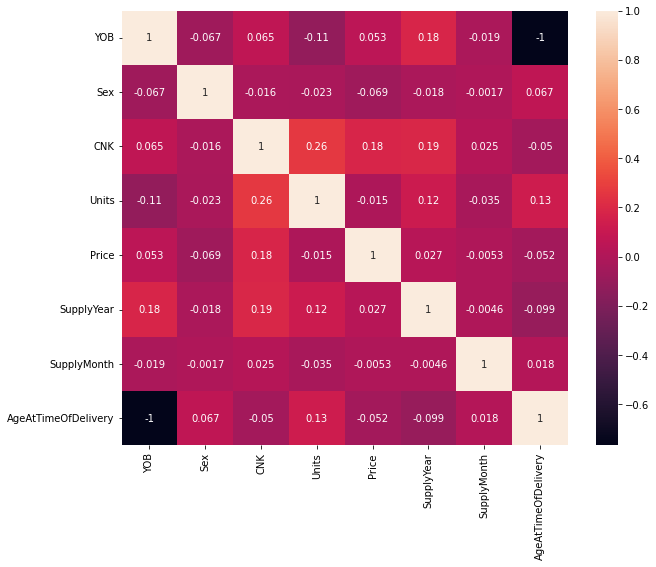

In [17]:
cdf=train_df.copy()
plt.subplots(figsize=(10,8))
colr=sns.heatmap(cdf.corr(),robust=True,annot=True)

#### Age distribution per drug category

By using a boxplot we are able to visualize the age distribution per drug category. The boxplot helps us understand which types of medicine are bought by which age group. It also helps us identify the outliers.

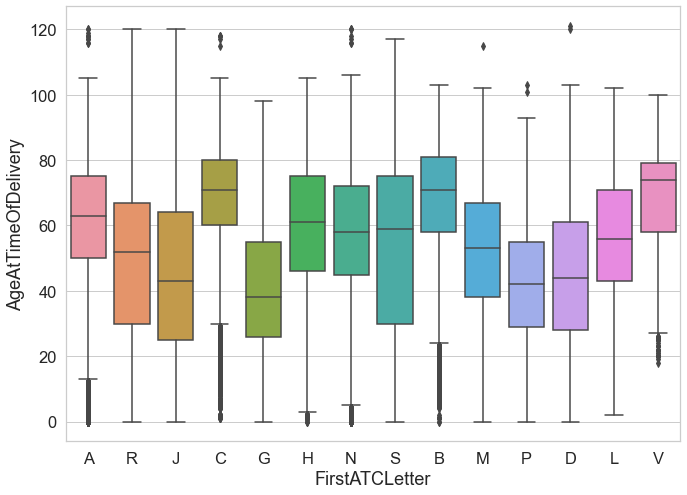

In [18]:
train_df = train_df.drop(train_df[train_df.AgeAtTimeOfDelivery > 250].index)
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(data=train_df, x='FirstATCLetter', y='AgeAtTimeOfDelivery')
plt.show()

#### Trends for different medicine categories for years 2018-2020

With the help of a bar chart we can visualize which drug category is the most popular among patients as well as in which month the most purchases are made. We do that for the last 3 years as it gives us the most up-to-date data which helps us distinguish the different trends.

In [19]:
for i in range(2018, 2021):
    drugs_per_year = train_df[train_df["SupplyYear"] == i].groupby(["SupplyMonth","FirstATCLetter"], as_index=False)["Units"].sum()
    drugs_per_year = drugs_per_year.sort_values('Units', ascending=False)
    fig = px.bar(drugs_per_year, x='SupplyMonth', y='Units', color='FirstATCLetter', title=f'Number of different drugs sold in {i}')
    fig.update_layout(barmode='group')
    fig.show()

From the bar charts above we can see that medicine from the C category which stands for the cardiovascular system has been the most purchased for every month in the last 3 years, followed by N (nervous system) and A (alimentary tract and metabolism). This graph helps us visualize what sort of medicine is purchased the most so we can use that data to predict how much of certain medicine needs to be in stock every month.

#### Trends for each ATC category

After visualizing all of the trends in the bar chart above, now we can visualize the trends for each ATC category using a line chart to better showcase those trends. The trends in the graph are also for the last 3 years.

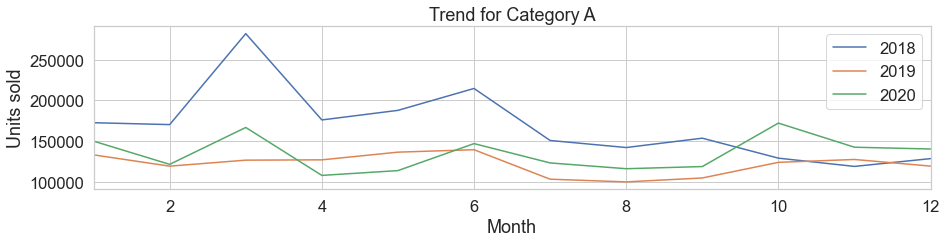

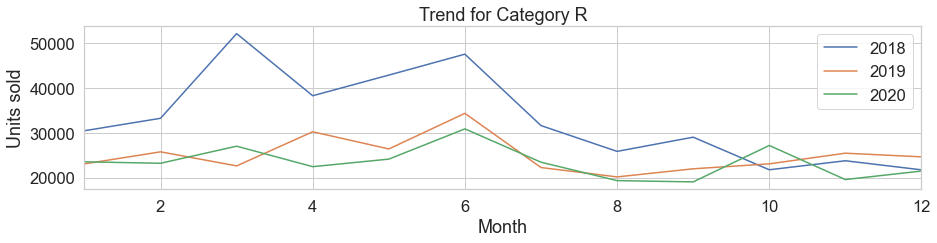

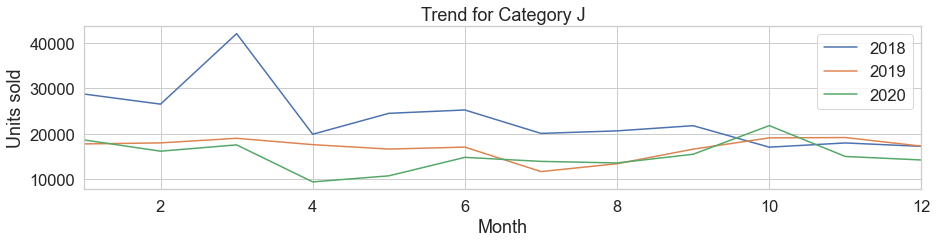

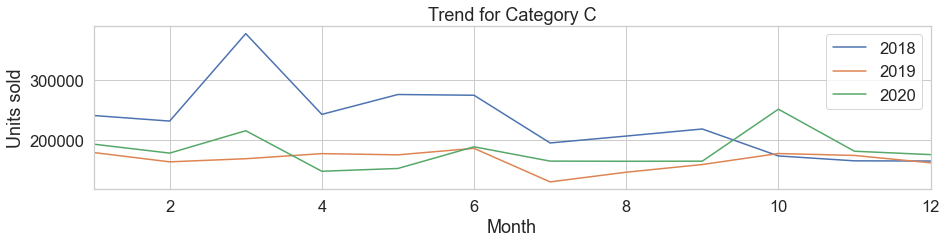

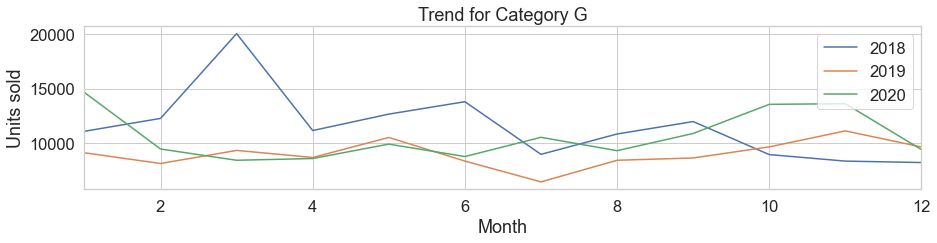

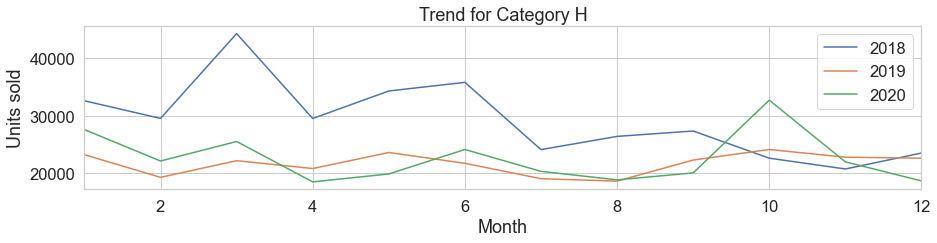

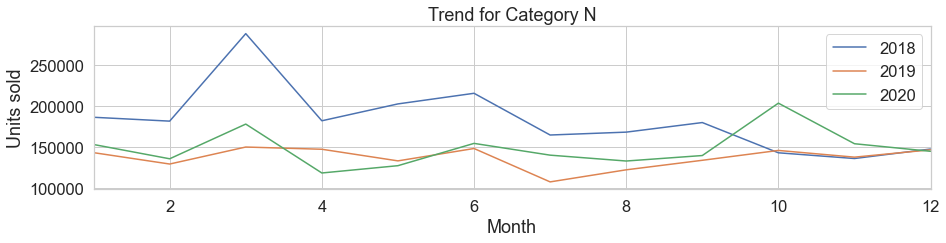

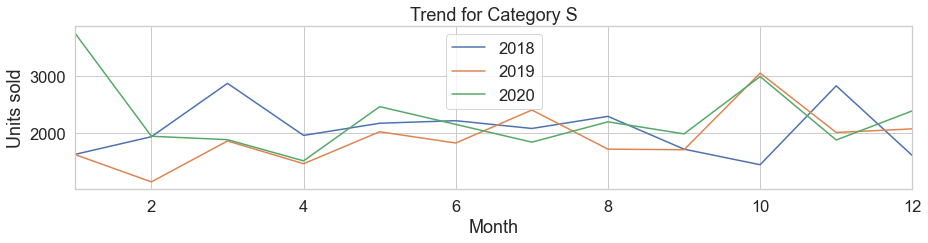

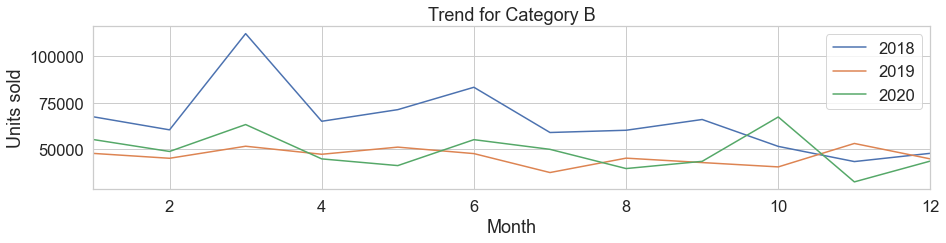

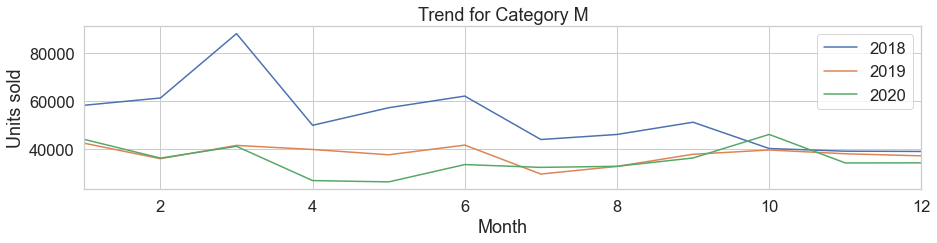

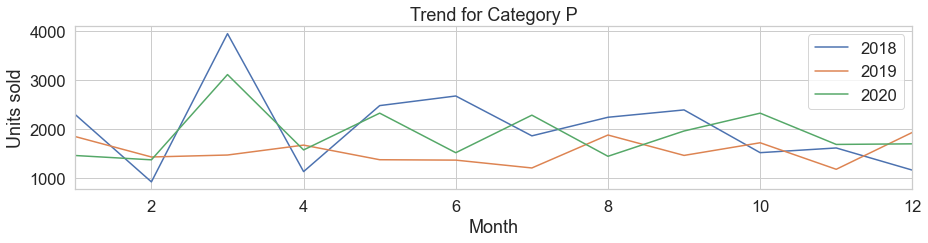

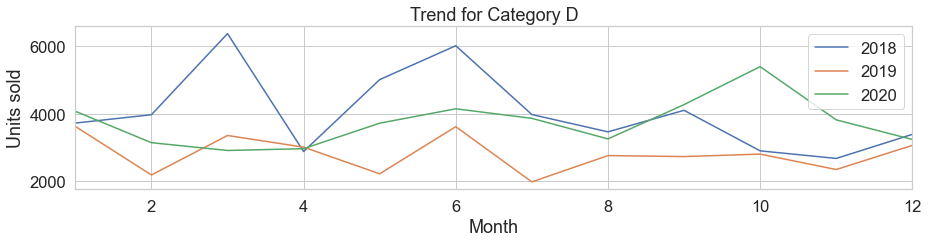

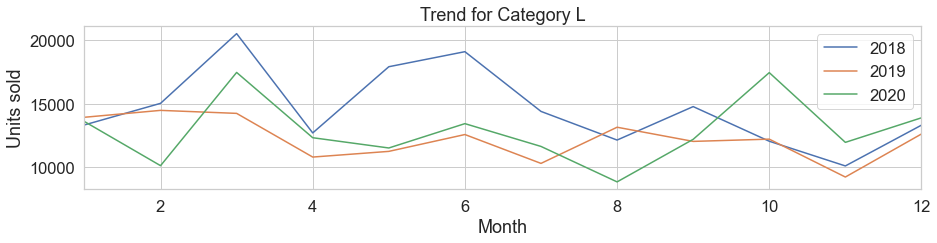

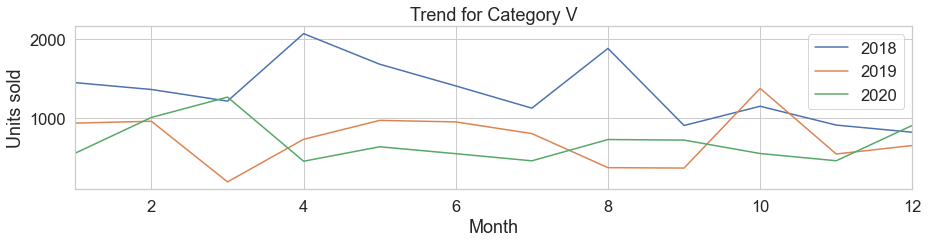

In [20]:
for ATCLetter in train_df['FirstATCLetter'].unique():
    currATCLetter = train_df[train_df["FirstATCLetter"] == ATCLetter]
    currATCLetter
    fig, ax = plt.subplots(figsize=(15,3))
    for i in range(2018,2021):
        drugs_per_year = currATCLetter[currATCLetter["SupplyYear"] == i].groupby(["SupplyMonth"])["Units"].sum()
        drugs_per_year.to_frame()
        ax.plot(drugs_per_year, label = i)
        ax.set_title("Trend for Category " + ATCLetter)
        ax.set_xlabel("Month")
        ax.set_ylabel("Units sold")
        ax.set_xlim(1, 12)
        ax.legend()
    plt.show()

#### Pharmacy sales per year

We decided to check which pharmacies sell the most medicine each year. We visualize that using a line chart which helped us discover that one of the pharmacies has not been in business for the last 3 years. After consulting with out client we were told to still use the data from that pharmacy but when creating the machine learning model, to not predict for that pharmacy because it is no longer in business.

In [21]:
units_per_pharmacy = train_df.groupby(["SupplyYear",'Pharmacy'], as_index=False)["Units"].sum()
fig = px.line(units_per_pharmacy, x='SupplyYear', y='Units', color='Pharmacy', title='Pharmacy sales per year')
fig.show()

#### Number of different drug categories sold per pharmacy

After checking the overall unit sales for each pharmacy throughout the year we decided to check the trends for which drug category is the most purchased for every month in the different pharmacies.

In [22]:
for pharmacy in train_df['Pharmacy'].unique():
    pharmacy_drugs = train_df[train_df["Pharmacy"] == pharmacy].groupby(["SupplyMonth","FirstATCLetter"], as_index=False)["Units"].sum()
    pharmacy_drugs = pharmacy_drugs.sort_values('Units', ascending=False)
    fig = px.bar(pharmacy_drugs, x='SupplyMonth', y='Units', color='FirstATCLetter', title=f'Number of different drugs sold in pharmacy {pharmacy}')
    fig.update_layout(barmode='group')
    fig.show()

#### Pharmacy revenue

By using a bar chart we were able to showcase the revenue generated by each pharmacy throughout the year for each month. This helps us in a way that we can see in which month the pharmacies generate the most revenue.

In [23]:
pharmacy_revenue = train_df.groupby(['SupplyMonth', 'Pharmacy'], as_index=False)["Price"].sum()
pharmacy_revenue['Price'].rename('Revenue')
fig = px.bar(pharmacy_revenue, x='SupplyMonth', y='Price', color='Pharmacy', title='Pharmacy revenue per month')
fig.update_layout(barmode='group')
fig.show()

#### Gender distribution

After consulting with our client we were informed that the values in the 'Sex' column represent: 1-Male; 2-Female; 0-Undefined. So to visualize the gender distribution we replaced those values with the appropriate gender.

In [24]:
gender = train_df.groupby('Sex', as_index=False).count()
gender = gender.replace({0:'Undefined', 1:'Male', 2:'Female'})
gender

Sex      PT      SD      ST  Pharmacy     YOB     CNK  ProductName  \
0  Undefined      12      12       6        12      12      12           12   
1       Male  497125  497125  267347    497125  497125  497125       497125   
2     Female  705640  705640  338368    705640  705640  705640       705640   

      ATC   Units   Price  SupplyYear  SupplyMonth  FirstATCLetter  \
0      12      12      12          12           12              12   
1  497125  497125  497125      497125       497125          497125   
2  705640  705640  705640      705640       705640          705640   

   AgeAtTimeOfDelivery  
0                   12  
1               497125  
2               705640

To show the gender distribution we used a pie chart. The gender distribution is about 60/40 for females/males as for the undefined there are almost no entries in the dataset.

In [25]:
fig = px.pie(gender, values=gender['ATC'].unique(), names=gender['Sex'].unique())
fig.show()

### Drug category trends for each gender

After showing the gender distribution we decided to check what types of medicine are used for each gender. We do that with the help of a bar chart. Firstly we visualize the different drug category sale for all of the gender then afterwards we have a seperate chart for each individual gender showing us what types of medicine they buy.

In [26]:
drugs_units_per_gender = train_df.groupby(['Sex', 'FirstATCLetter'], as_index = False)['Units'].sum()
drugs_units_per_gender = drugs_units_per_gender.replace({0:'Undefined', 1:'Male', 2:'Female'})
all_sex = drugs_units_per_gender['Sex'].unique()
drugs_units_per_gender = drugs_units_per_gender.sort_values('Units', ascending = True)
fig = px.bar(drugs_units_per_gender, x='FirstATCLetter', y='Units', color='Sex', title=f'Total amount of different drugs sold per gender ')
fig.update_layout(barmode='group')
fig.show()

In [27]:
for i in all_sex:
    drugs_units_per_gender = train_df.groupby(['Sex', 'FirstATCLetter'], as_index = False)['Units'].sum()
    drugs_units_per_gender = drugs_units_per_gender.replace({0:'Undefined', 1:'Male', 2:'Female'})
    drugs_units_per_gender_0 = drugs_units_per_gender[drugs_units_per_gender['Sex'] == i]
    drugs_units_per_gender_0 = drugs_units_per_gender_0.sort_values('Units', ascending = True)
    fig = px.bar(drugs_units_per_gender_0, x='FirstATCLetter', y='Units', title=f'Number of different drugs sold to ' + i + ' patients')
    fig.update_layout(barmode='group')
    fig.show()